In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline 

In [66]:
def plot_te_all(ttle, eta, n_tasks, n_alg, alg_name):
    fig, ax = plt.subplots(1,1, figsize=(8,8))
    clr = ["#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#000000"]
    c = sns.color_palette(clr, n_colors=n_alg)
    for i in range(n_tasks - 1):
        
        et = np.zeros((n_alg,n_tasks-i))
        
        for j in range(0,n_alg):
            et[j,:] = np.asarray(eta[j][i])
        
        ns = np.arange(i + 1, n_tasks + 1)
        for j in range(0,n_alg):
            if j == 0:
                if i == 0:
                    ax.plot(ns, et[j,:], label = alg_name[j], c=c[j], linewidth = 2.6)
                else:
                    ax.plot(ns, et[j,:], c=c[j], linewidth = 2.6)
            else:
                if i == 0:
                    ax.plot(ns, et[j,:], label = alg_name[j], c=c[j])
                else:
                    ax.plot(ns, et[j,:], c=c[j])
    
    
    ax.set_title(ttle, fontsize=20)
    ax.set_xlabel('Number of tasks seen', fontsize=18)
    ax.set_ylabel('Backward Transfer Efficiency', fontsize=18)
    # ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
    # box = ax.get_position()
    # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.legend(loc='upper left', fontsize=12)
    ax.set_yticks([.4,.6,.8,1, 1.2])
    ax.set_ylim(0.79, 1.21)
    ax.set_xticks(np.arange(1,11))
    ax.tick_params(labelsize=14)
    ax.grid(axis='x')
    plt.tight_layout()
    
    plt.savefig('cifar-100-RTE.pdf')

In [67]:
def calc_rte(err, ntasks):
    task_err = [[err[i][0]/err[i][j] for j in range(0,ntasks-i)] for i in range(0,ntasks)]
    
    return task_err

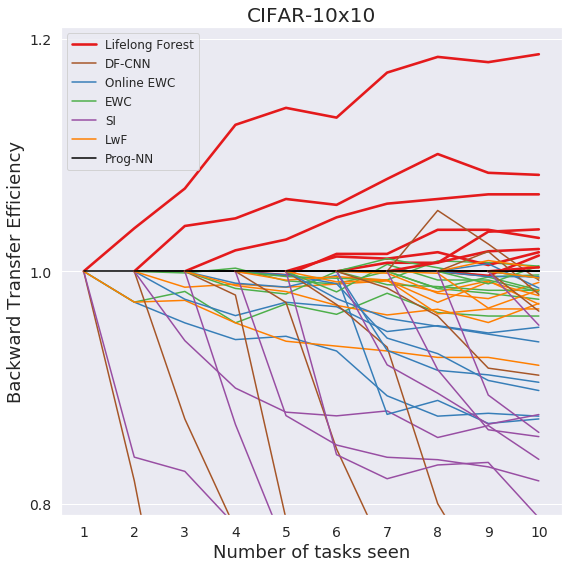

In [141]:
err_L2F = [[0.616,0.594,0.575,0.547,0.54,0.544,0.526,0.52,0.522,0.519],
           [0.665,0.64,0.636,0.626,0.629,0.616,0.604,0.613,0.614],
           [0.563,0.553,0.548,0.538,0.532,0.53,0.528,0.528],
           [0.608,0.61,0.599,0.599,0.587,0.587,0.591],
           [0.555,0.548,0.549,0.546,0.552,0.546],
           [0.545,0.541,0.541,0.527,0.526],
           [0.53,0.526,0.521,0.52],
           [0.521,0.523,0.514],
           [0.575, 0.573],
           [0.482]]

err_L2F_reduced = [[0.6456, 0.6104, 0.5905, 0.5764, 0.5653, 0.5509, 0.5437, 0.5399, 0.5368, 0.5329],
                   [0.6825, 0.6652, 0.6514, 0.6398, 0.6333, 0.6311, 0.6236, 0.6191, 0.6203],
                   [0.5821, 0.5669, 0.5545, 0.5525, 0.5488, 0.5434, 0.5423, 0.5383],
                   [0.622,  0.6112, 0.6002, 0.5947, 0.5928, 0.5899, 0.587 ],
                   [0.5732, 0.5699, 0.5654, 0.559,  0.5588, 0.5534],
                   [0.5521, 0.5438, 0.5369, 0.5364, 0.5356],
                   [0.5252, 0.519,  0.5171, 0.5146],
                   [0.5399, 0.5326, 0.533 ],
                   [0.5852, 0.5792],
                   [0.4942]]
err_online_ewc = [[0.625,0.642,0.654,0.664,0.662,0.671,0.7,0.714,0.712,0.714], [0.732,0.75,0.761,0.752,0.755,0.772,0.7679,0.773,0.769],
                  [0.584,0.59,0.592,0.586,0.666,0.657,0.672,0.669], [0.656,0.658,0.663,0.696,0.706,0.724,0.731],
                  [0.665,0.681,0.693,0.698,0.703,0.708], [0.644,0.691,0.704,0.707,0.712],
                  [0.617,0.617,0.613,0.626], [0.66,0.663,0.663], [0.695,0.699], [0.635]]

err_ewc = [[0.625,0.642,0.636,0.654,0.643,0.649,0.637,0.648,0.65,0.65], [0.73,0.731,0.728,0.736,0.738,0.73,0.741,0.744,0.748],
           [0.603,0.612,0.615,0.603,0.61,0.611,0.613,0.613], [0.672,0.675,0.676,0.677,0.666,0.667,0.669],
           [0.666,0.678,0.662,0.671,0.671,0.678], [0.649,0.642,0.647,0.652,0.651],
           [0.607,0.616,0.61,0.617], [0.644,0.651,0.641], [0.71, 0.714], [0.652]]

err_SI = [[0.625,0.744,0.755,0.8,0.815,0.815,0.809,0.851,0.81,0.825], [0.725,0.771,0.806,0.825,0.828,0.824,0.846,0.836,0.865],
          [0.547,0.63,0.719,0.739,0.789,0.791,0.782,0.779], [0.677,0.773,0.796,0.806,0.808,0.814,0.826],
          [0.635,0.754,0.773,0.762,0.76,0.806], [0.64,0.696,0.715,0.737,0.73], [0.627,0.685,0.726,0.731],
          [0.646,0.723,0.75], [0.72,0.755], [0.624]]

err_LwF = [[0.625,0.642,0.641,0.654,0.665,0.668,0.671,0.675,0.675,0.68], [0.722,0.732,0.73,0.732,0.73,0.728,0.735,0.728,0.743],
           [0.564,0.571,0.574,0.581,0.586,0.583,0.59,0.58], [0.658,0.663,0.661,0.663,0.683,0.68,0.68],
           [0.656,0.662,0.661,0.674,0.662,0.67], [0.624,0.625,0.636,0.639,0.63], [0.612,0.613,0.632,0.622],
           [0.651,0.645,0.649], [0.702,0.706], [0.608]]

err_df_cnn = [[0.273,0.333,0.457,0.573,0.701,0.754,0.768,0.774,0.786,0.799],
              [0.316,0.362,0.406,0.502,0.594,0.616,0.66,0.676,0.704],
              [0.288,0.294,0.366,0.469,0.535,0.604,0.635,0.671],
              [0.327,0.336,0.386,0.434,0.485,0.529,0.584],
              [0.272,0.28,0.291,0.34,0.374,0.421],
              [0.275,0.279,0.286,0.3,0.302],
              [0.261,0.248,0.255,0.263],
              [0.297,0.292,0.303],
              [0.282,0.292],
              [0.235]]

err_prog_nn = [[0.284,0.284,0.284,0.284,0.284,0.284,0.284,0.284,0.284,0.284],
               [0.342,0.342,0.342,0.342,0.342,0.342,0.342,0.342,0.342],
               [0.254,0.254,0.254,0.254,0.254,0.254,0.254,0.254],
               [0.31,0.31,0.31,0.31,0.31,0.31,0.31],
               [0.28,0.28,0.28,0.28,0.28,0.28],
               [0.281,0.281,0.281,0.281,0.281],
               [0.276,0.276,0.276,0.276],
               [0.276,0.276,0.276],
               [0.285,0.285],
               [0.234]]

plt_rte = [calc_rte(err_L2F,10), calc_rte(err_df_cnn,10), calc_rte(err_online_ewc,10), calc_rte(err_ewc,10), calc_rte(err_SI,10), calc_rte(err_LwF,10), calc_rte(err_prog_nn,10)]
names = ['Lifelong Forest', 'DF-CNN','Online EWC', 'EWC', 'SI', 'LwF', 'Prog-NN']
'Online EWC on CIFAR-10x10'
#plot_te('Online EWC on CIFAR-10x10',eta_online_ewc,10)
#plot_te('EWC on CIFAR-10x10',eta_ewc,10)
plot_te_all('CIFAR-10x10',plt_rte,10,7,names)

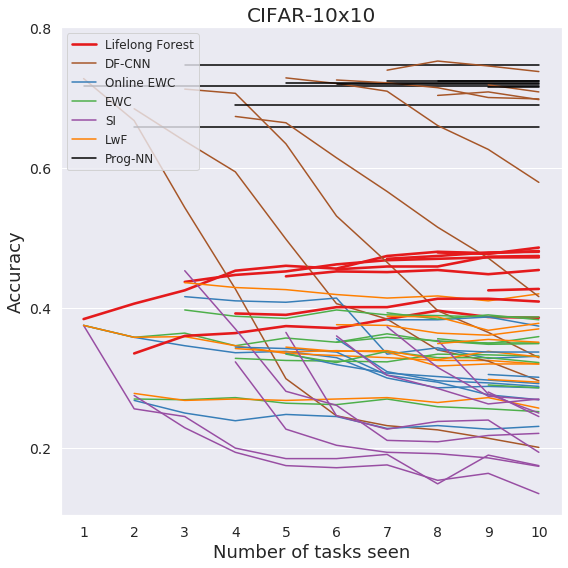

In [142]:
err_L2F_1 = [0.616,0.695,0.573,0.628,0.62,0.597,0.577,0.595,0.651,0.6]
err_L2F_reduced_1 = [0.3544, 0.3106, 0.3825, 0.324,  0.3703, 0.3734, 0.3982, 0.3828, 0.3365, 0.3988]
err_online_ewc_1 = [0.625,0.846,0.748,0.824,0.777,0.776,0.782,0.805,0.817,0.759]

err_ewc_1 = [0.625,0.846,0.748,0.824,0.777,0.776,0.782,0.805,0.817,0.759]

err_SI_1 = [0.625,0.846,0.748,0.824,0.777,0.776,0.782,0.805,0.817,0.759]

err_LwF_1 = [0.625,0.846,0.748,0.824,0.777,0.776,0.782,0.805,0.817,0.759]
err_df_cnn_1 = [0.273,0.317,0.286,0.308,0.286,0.282,0.287,0.301,0.33,0.288]
err_prog_nn_1 = [0.284,0.299,0.279,0.288,0.28,0.271,0.277,0.257,0.271,0.274]
#plt_rte = [calc_end_te(err_L2F, err_L2F_1, 10), calc_end_te(err_online_ewc, err_online_ewc_1, 10), calc_end_te(err_ewc, err_ewc_1, 10), calc_end_te(err_SI, err_SI_1, 10), calc_end_te(err_LwF, err_LwF_1,10)]
plt_rte = [calc_end_e(err_L2F, 10), calc_end_e(err_df_cnn, 10), calc_end_e(err_online_ewc, 10), calc_end_e(err_ewc, 10), calc_end_e(err_SI, 10), calc_end_e(err_LwF, 10), calc_end_e(err_prog_nn, 10)]

names = ['Lifelong Forest', 'DF-CNN', 'Online EWC', 'EWC', 'SI', 'LwF', 'Prog-NN']
'Online EWC on CIFAR-10x10'
#plot_te('Online EWC on CIFAR-10x10',eta_online_ewc,10)
#plot_te('EWC on CIFAR-10x10',eta_ewc,10)
plot_e_all('CIFAR-10x10',plt_rte,10,7,names)

In [37]:
def calc_te(err, err_1, ntasks):
    task_err = [[err_1[i]/err[i][j] for j in range(0,ntasks-i)] for i in range(0,ntasks)]
    
    return task_err

In [67]:
def plot_te_all(ttle, eta, n_tasks, n_alg, alg_name):
    fig, ax = plt.subplots(1,1, figsize=(8,8))
    clr = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00"]
    c = sns.color_palette(clr, n_colors=5)
    
    et = np.zeros((n_tasks),dtype=float)
    ns = np.arange(1, n_tasks+1)
    for j in range(0,n_alg):
        et = np.asarray(eta[j])
        
        if j == 0:
            ax.plot(ns, et, label = alg_name[j], c=c[j], linewidth = 2.6)
        else:
            ax.plot(ns, et, label = alg_name[j], c=c[j])
    
    
    ax.set_title(ttle, fontsize=20)
    ax.set_xlabel('Number of tasks', fontsize=18)
    ax.set_ylabel('End Transfer Efficiency', fontsize=18)
    # ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
    # box = ax.get_position()
    # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.legend(loc='upper left', fontsize=12)
    ax.set_yticks([.7,.8,.9,1, 1.1, 1.2])
    ax.set_xticks(np.arange(1,11))
    ax.tick_params(labelsize=14)
    ax.grid(axis='x')
    plt.tight_layout()
    
    plt.savefig('cifar-100-ETE.pdf')

In [40]:
def calc_end_te(err, err_1, ntasks):
    task_err = [err_1[i]/err[i][ntasks-i-1] for i in range(0,ntasks)]
    
    return task_err

In [17]:
def calc_end_e(err, ntasks):
    task_err = [[(1 - err[i][j]) for j in range(0,ntasks-i)] for i in range(0,ntasks)]
    
    return task_err

In [15]:
def plot_e_all(ttle, eta, n_tasks, n_alg, alg_name):
    fig, ax = plt.subplots(1,1, figsize=(8,8))
    clr = ["#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#000000"]
    c = sns.color_palette(clr, n_colors=n_alg)
    for i in range(n_tasks - 1):
        
        et = np.zeros((n_alg,n_tasks-i))
        
        for j in range(0,n_alg):
            et[j,:] = np.asarray(eta[j][i])
        
        ns = np.arange(i + 1, n_tasks + 1)
        for j in range(0,n_alg):
            if j == 0:
                if i == 0:
                    ax.plot(ns, et[j,:], label = alg_name[j], c=c[j], linewidth = 2.6)
                else:
                    ax.plot(ns, et[j,:], c=c[j], linewidth = 2.6)
            else:
                if i == 0:
                    ax.plot(ns, et[j,:], label = alg_name[j], c=c[j])
                else:
                    ax.plot(ns, et[j,:], c=c[j])
    
    
    ax.set_title(ttle, fontsize=20)
    ax.set_xlabel('Number of tasks seen', fontsize=18)
    ax.set_ylabel('Accuracy', fontsize=18)
    # ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
    # box = ax.get_position()
    # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.legend(loc='upper left', fontsize=12)
    ax.set_yticks([.2,.4,.6,.8])
    ax.set_xticks(np.arange(1,11))
    ax.tick_params(labelsize=14)
    ax.grid(axis='x')
    plt.tight_layout()
    
    plt.savefig('cifar-100-E.pdf')

In [170]:
from statistics import median 
rte = calc_rte(err_SI,10)

n_tasks = 10
eta = np.zeros(10,dtype=float)

for i in range(n_tasks):
    eta[i] = rte[i][n_tasks-1-i]
#print(rte)
#val = np.mean(eta)
#med = median(eta)
print(np.round(rte[0][9],2))

[[1.0, 0.9735202492211837, 0.9750390015600624, 0.9556574923547401, 0.9398496240601504, 0.93562874251497, 0.9314456035767511, 0.9259259259259258, 0.9259259259259258, 0.9191176470588235], [1.0, 0.9863387978142076, 0.989041095890411, 0.9863387978142076, 0.989041095890411, 0.9917582417582418, 0.982312925170068, 0.9917582417582418, 0.971736204576043], [1.0, 0.9877408056042032, 0.9825783972125436, 0.9707401032702238, 0.962457337883959, 0.967409948542024, 0.9559322033898304, 0.9724137931034482], [1.0, 0.9924585218702866, 0.9954614220877458, 0.9924585218702866, 0.9633967789165446, 0.9676470588235294, 0.9676470588235294], [1.0, 0.9909365558912386, 0.9924357034795764, 0.973293768545994, 0.9909365558912386, 0.9791044776119403], [1.0, 0.9984, 0.9811320754716981, 0.9765258215962441, 0.9904761904761905], [1.0, 0.99836867862969, 0.9683544303797468, 0.9839228295819935], [1.0, 1.0093023255813953, 1.0030816640986133], [1.0, 0.9943342776203966], [1.0]]


In [151]:
from statistics import median 

FTE = [err_ewc_1[i]/err_ewc[i][0] for i in range(0,10)]
print(np.round(FTE[9],2))

1.16


In [48]:
[err_prog_nn_1[i]/err_prog_nn[i][0] for i in range(0,10)]

[1.0,
 0.8742690058479531,
 1.0984251968503937,
 0.9290322580645161,
 1.0,
 0.9644128113879004,
 1.0036231884057971,
 0.931159420289855,
 0.9508771929824563,
 1.170940170940171]

In [50]:
er_ewc = [[0.111,0.105],[0.113,0.131],[0.114,0.117],[0.114,0.125],[0.107,0.143],[0.116,0.09],[0.112,0.109],[0.118,0.108],
          [0.118,0.114]]
er_online_ewc = [[0.111,0.105],[0.113,0.131],[0.114,0.117],[0.114,0.125],[0.107,0.143],[0.116,0.09],[0.112,0.109],[0.118,0.108],
          [0.118,0.114]]

er_si = [[0.093,0.1],[0.104,0.115],[0.092,0.106],[0.117,0.092],[0.111,0.103],[0.126,0.095],[0.105,0.089],[0.106,0.108],
         [0.101,0.13]]

er_LwF = [[0.103,0.093],[0.104,0.096],[0.121,0.106],[0.117,0.108],[0.11,0.125],[0.102,0.087],[0.11,0.103],[0.109,0.107],
          [0.105,0.123]]

In [56]:
def calc_FTE(err):
    FTE1 = [.117/err[i][0] for i in range(9)]
    
    return FTE1

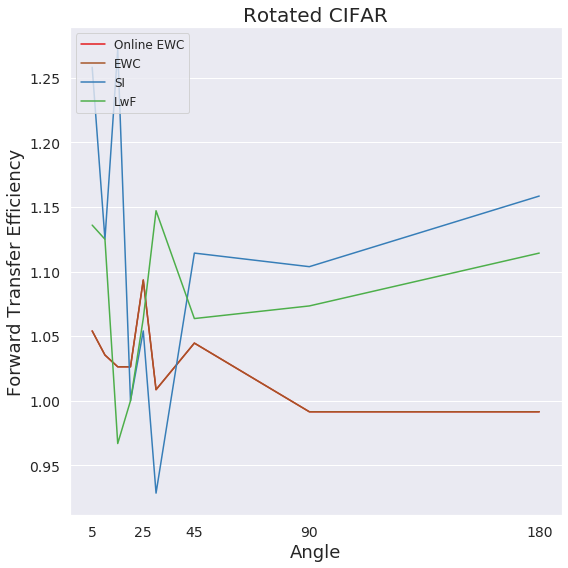

In [64]:
names = ['Online EWC', 'EWC', 'SI', 'LwF']
angles = [5,10,15,20,25,30,45,90,180]
fte = [calc_FTE(er_online_ewc),calc_FTE(er_ewc),calc_FTE(er_si),calc_FTE(er_LwF)]

fig, ax = plt.subplots(1,1, figsize=(8,8))
clr = ["#e41a1c", "#a65628", "#377eb8", "#4daf4a"]
c = sns.color_palette(clr, n_colors=4)

for i in range(4):
    ax.plot(angles, fte[i], label = names[i], c=c[i])

    
ax.set_title('Rotated CIFAR', fontsize=20)
ax.set_xlabel('Angle', fontsize=18)
ax.set_ylabel('Forward Transfer Efficiency', fontsize=18)
    # ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
    # box = ax.get_position()
    # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='upper left', fontsize=12)
#ax.set_yticks([.4,.6,.8,1, 1.2])
#ax.set_ylim(0.79, 1.21)
ax.set_xticks([5,25,45,90,180])
ax.tick_params(labelsize=14)
ax.grid(axis='x')
plt.tight_layout()
    
plt.savefig('cifar-100-rotated-FTE.pdf')

In [59]:
fte

[[1.0540540540540542,
  1.0353982300884956,
  1.0263157894736843,
  1.0263157894736843,
  1.0934579439252337,
  1.0086206896551724,
  1.0446428571428572,
  0.9915254237288137,
  0.9915254237288137],
 [1.0540540540540542,
  1.0353982300884956,
  1.0263157894736843,
  1.0263157894736843,
  1.0934579439252337,
  1.0086206896551724,
  1.0446428571428572,
  0.9915254237288137,
  0.9915254237288137],
 [1.2580645161290323,
  1.1250000000000002,
  1.2717391304347827,
  1.0,
  1.0540540540540542,
  0.9285714285714286,
  1.1142857142857143,
  1.1037735849056605,
  1.1584158415841583],
 [1.1359223300970875,
  1.1250000000000002,
  0.9669421487603307,
  1.0,
  1.0636363636363637,
  1.147058823529412,
  1.0636363636363637,
  1.073394495412844,
  1.1142857142857143]]

In [115]:
plt_rte

[[[1.0,
   1.037037037037037,
   1.071304347826087,
   1.126142595978062,
   1.1407407407407406,
   1.1323529411764706,
   1.1711026615969582,
   1.1846153846153846,
   1.1800766283524904,
   1.186897880539499],
  [1.0,
   1.0390625,
   1.0455974842767295,
   1.0623003194888179,
   1.057233704292528,
   1.0795454545454546,
   1.1009933774834437,
   1.0848287112561175,
   1.0830618892508144],
  [1.0,
   1.0180831826401444,
   1.0273722627737225,
   1.0464684014869887,
   1.0582706766917291,
   1.062264150943396,
   1.0662878787878787,
   1.0662878787878787],
  [1.0,
   0.9967213114754099,
   1.015025041736227,
   1.015025041736227,
   1.0357751277683136,
   1.0357751277683136,
   1.0287648054145517],
  [1.0,
   1.0127737226277371,
   1.010928961748634,
   1.0164835164835164,
   1.0054347826086956,
   1.0164835164835164],
  [1.0,
   1.0073937153419594,
   1.0073937153419594,
   1.0341555977229602,
   1.0361216730038023],
  [1.0, 1.0076045627376427, 1.017274472168906, 1.0192307692307692],